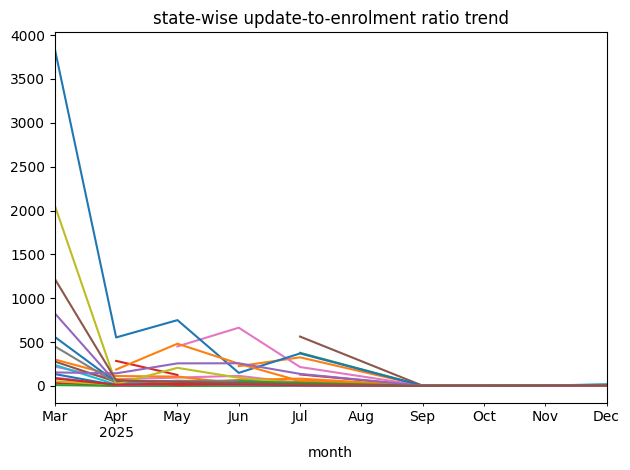

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

enrolment_df["month"]=pd.to_datetime(enrolment_df["date"]).dt.to_period("M")
updates=pd.concat([demographic_df,biometric_df])
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M")

e=enrolment_df.groupby(["state","month"]).size()
u=updates.groupby(["state","month"]).size()

ratio=(u/e).unstack()

ratio.T.plot(legend=False)
plt.title("state-wise update-to-enrolment ratio trend")
plt.tight_layout()
plt.show()
